In [1]:
import numpy as np
import pandas as pd
import timeit

In [2]:
df = pd.read_csv('../data/BPD_CRIME_DATA_ENCODED.csv')

In [3]:
df.head(10)

,Unnamed: 0,Description,Post,District,Neighborhood,Longitude,Latitude,Premise,Month,Hour,...,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter
0,0,12,913.0,6,26,-76.60541,39.22951,93,9,23,...,0,0,0,1,0,0,0,0,1,0
1,1,3,133.0,0,214,-76.63217,39.31360,103,9,23,...,1,0,0,0,1,0,0,0,1,0
2,2,14,524.0,3,268,-76.60697,39.34768,103,9,22,...,1,1,0,0,0,0,0,0,1,0
3,3,0,934.0,6,37,-76.64526,39.28315,93,9,22,...,0,0,0,0,0,1,0,0,1,0
4,4,5,113.0,0,63,-76.61365,39.28756,103,9,22,...,1,0,1,0,0,0,0,0,1,0
5,5,4,922.0,6,45,-76.62131,39.24867,93,9,22,...,0,0,0,0,1,0,0,0,1,0
6,6,6,232.0,5,32,-76.56827,39.28202,103,9,21,...,1,1,0,0,0,0,0,0,1,0
7,7,13,123.0,0,249,-76.62789,39.30254,103,9,21,...,1,0,0,0,1,0,0,0,1,0
8,8,0,641.0,4,267,-76.68365,39.31370,103,9,21,...,1,0,0,0,0,1,0,0,1,0
9,9,5,332.0,1,15,-76.57419,39.30551,93,9,21,...,0,0,1,0,0,0,0,0,1,0


In [4]:
uc2_df = df[['Outside', 'Weapon_FIREARM','Weapon_HANDS','Weapon_KNIFE','Weapon_NONE','Weapon_OTHER', 'Neighborhood', 'Premise', 'Month', 'Hour','Description']]

In [5]:
X = uc2_df.drop(columns = ['Description'])
Y = uc2_df['Description']

In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [7]:
Lin_SVC = LinearSVC(random_state=5,max_iter=10000,multi_class="ovr")

In [9]:
from sklearn.model_selection import cross_val_score

In [9]:
start = timeit.default_timer()
scores = cross_val_score(Lin_SVC, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  4803.7388706


In [12]:
scores

array([0.23303586, 0.23636201, 0.20444472, 0.18134136, 0.19534521])

### This seems to not work as well as just one-hoting everything....let's use the original un-encoded data

In [18]:
df2 = pd.read_csv('../data/BPD_CRIME_DATA_CLEAN.csv')
df2.head(10)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,Season,Month,Hour
0,2017-09-02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,Inside,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,summer,9,23
1,2017-09-02,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,Outside,NONE,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,summer,9,23
2,2017-09-02,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",STREET,1,summer,9,22
3,2017-09-02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,Inside,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,summer,9,22
4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,Outside,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,summer,9,22
5,2017-09-02,22:00:00,5A,CHERRYCREST RD,BURGLARY,Inside,NONE,922.0,SOUTHERN,Cherry Hill,-76.62131,39.24867,"(39.2486700000, -76.6213100000)",ROW/TOWNHO,1,summer,9,22
6,2017-09-02,21:15:00,1F,3400 HARMONY CT,HOMICIDE,Outside,FIREARM,232.0,SOUTHEASTERN,Canton,-76.56827,39.28202,"(39.2820200000, -76.5682700000)",STREET,1,summer,9,21
7,2017-09-02,21:35:00,3B,400 W LANVALE ST,ROBBERY - STREET,Outside,NONE,123.0,CENTRAL,Upton,-76.62789,39.30254,"(39.3025400000, -76.6278900000)",STREET,1,summer,9,21
8,2017-09-02,21:00:00,4C,2300 LYNDHURST AVE,AGG. ASSAULT,Outside,OTHER,641.0,NORTHWESTERN,Windsor Hills,-76.68365,39.31370,"(39.3137000000, -76.6836500000)",STREET,1,summer,9,21
9,2017-09-02,21:00:00,4E,1200 N ELLWOOD AVE,COMMON ASSAULT,Inside,HANDS,332.0,EASTERN,Berea,-76.57419,39.30551,"(39.3055100000, -76.5741900000)",ROW/TOWNHO,1,summer,9,21


In [19]:
uc2_df_raw = df2[['Inside/Outside', 'Weapon', 'Neighborhood', 'Premise', 'Month', 'Hour','Description']]

In [20]:
uc2_df_1hot = pd.get_dummies(uc2_df_raw, columns = ['Inside/Outside', 'Weapon', 'Neighborhood', 'Premise', 'Month', 'Hour'])

In [21]:
X_raw = uc2_df_raw.drop(columns = ['Description'])
Y_raw = uc2_df_raw['Description']

In [22]:
X_1hot = uc2_df_1hot.drop(columns = ['Description'])
Y_1hot = uc2_df_1hot['Description']

### SVC needs to have numerical data

In [68]:
start = timeit.default_timer()
scores = cross_val_score(Lin_SVC, X_1hot, Y_1hot, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  36.170450900000105


In [69]:
np.mean(scores)

0.37987782098653705

### Looks like SVC somehow runs way faster with 400 features encoded this way, with better F1 score as well.

In [73]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=42069, max_depth=10)

In [74]:
start = timeit.default_timer()
scores = cross_val_score(decisiontree, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.679333900000529


In [75]:
np.mean(scores)

0.36238750220282967

In [78]:
start = timeit.default_timer()
scores = cross_val_score(decisiontree, X_1hot, Y_1hot, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  7.723623400000179


In [79]:
np.mean(scores)

0.33490280127149696

### Alright this is a bit more along the lines of what I was expecting. Trees and label encoding it is.

In [80]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42069, n_estimators=100)

In [81]:
start = timeit.default_timer()
scores = cross_val_score(RF, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  20.41716610000003


In [82]:
np.mean(scores)

0.35047364964988215

In [85]:
start = timeit.default_timer()
scores = cross_val_score(RF, X_1hot, Y_1hot, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  237.8473168999999


In [86]:
np.mean(scores)

0.3713700388817019

### Let's stick to the label encoded data

In [25]:
import lightgbm as lgb

In [112]:
clf = lgb.LGBMClassifier(objective='multiclass',
                         random_state=42069, silent=True, 
                         n_jobs=-1, n_estimators=100, class_weight='balanced')

In [113]:
start = timeit.default_timer()
scores = cross_val_score(clf, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  16.556128099999114


In [114]:
np.mean(scores)

0.37961515279128244

In [109]:
clftest = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,  
                         n_jobs=-1, n_estimators=100)

In [110]:
start = timeit.default_timer()
scores = cross_val_score(clftest, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  16.58224209999935


In [111]:
np.mean(scores)

0.3934788496293208

In [117]:
clfbin = lgb.LGBMClassifier(objective='binary',
                         random_state=42069, silent=True,  
                         n_jobs=-1, n_estimators=100)
YOLO = OneVsRestClassifier(clfbin)

In [118]:
start = timeit.default_timer()
scores = cross_val_score(YOLO, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  18.24579050000102


In [119]:
np.mean(scores)

0.39380963781716927

In [128]:
from sklearn.multiclass import OneVsOneClassifier

OneVsOneClassifier = OneVsOneClassifier(clfbin)

In [129]:
start = timeit.default_timer()
scores = cross_val_score(OneVsOneClassifier, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  47.00051369999892


In [130]:
np.mean(scores)

0.3915604296048928

In [132]:
clftest = lgb.LGBMClassifier(max_depth=10,objective='multiclass',num_class=15,
                         random_state=42069, silent=True,  
                         n_jobs=-1, n_estimators=100)

In [133]:
start = timeit.default_timer()
scores = cross_val_score(clftest, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  17.752916400000686


In [134]:
np.mean(scores)

0.3959441676568475

### Alright the extra layer doesn't seem to add much with the OVO or OVR. But the max_depth is very impactful. Let's try XGBoost now

In [26]:
import xgboost as xgb

In [140]:
EXTREME = xgb.XGBClassifier(max_depth=10,objective="multiclass",num_class=15, random_state=42069, n_jobs=-1, n_estimators=100)

In [141]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  162.03995419999956


In [142]:
np.mean(scores)

0.39240706239763695

### Let's optimize the two gradient boosting methods.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [13]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=2, high=20),
        'num_leaves': randint(low=4, high=40)
    }

In [28]:
LGBC = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,  
                         n_jobs=-1,force_col_wise=True)

In [16]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069)

In [17]:
LGBM_rand_search.fit(X,Y)

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(force_col_wise=True, num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001409E1AE6A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001409E1AE490>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001409E1AE7F0>},
                   random_state=42069, scoring='f1_macro')

In [18]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.3858947508563777 {'max_depth': 11, 'n_estimators': 97, 'num_leaves': 10}
0.38941148152591376 {'max_depth': 16, 'n_estimators': 16, 'num_leaves': 36}
0.3795571968057777 {'max_depth': 10, 'n_estimators': 199, 'num_leaves': 7}
0.366023138073585 {'max_depth': 7, 'n_estimators': 6, 'num_leaves': 15}
0.36445218683372865 {'max_depth': 12, 'n_estimators': 8, 'num_leaves': 12}
0.38882679140506393 {'max_depth': 14, 'n_estimators': 196, 'num_leaves': 22}
0.3892916156701003 {'max_depth': 4, 'n_estimators': 114, 'num_leaves': 23}
0.3924125008824013 {'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.3915480588038748 {'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.38907970187285645 {'max_depth': 6, 'n_estimators': 51, 'num_leaves': 14}
0.3731934637553084 {'max_depth': 17, 'n_estimators': 77, 'num_leaves': 4}
0.38987709711828017 {'max_depth': 16, 'n_estimators': 167, 'num_leaves': 37}
0.3918099493484415 {'max_depth': 16, 'n_estimators': 136, 'num_leaves': 32}
0.38474121578546094 {'

In [19]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=2, high=12),
        'min_child_weight': randint(low=1,high=8)
    }

In [21]:
EXTREME_BOOSTING = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, random_state=42069, n_jobs=-1,verbosity=0,seed=42069)

In [24]:
EXTREME_rand_search = RandomizedSearchCV(EXTREME_BOOSTING, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='f1_macro', random_state=42069)

### This keeps bluescreening my computer. I was not able to find out why. I'll do 10 iterations manually.

In [19]:
np.random.randint(1,200)

102

In [20]:
np.random.randint(2,12)

5

In [21]:
np.random.randint(1,8)

5

In [22]:
EXTREME_BOOSTING1 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=202,
                                     max_depth=5,
                                     min_child_weight=5)

In [25]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING1, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  149.09187560000004


In [26]:
np.mean(scores)

0.3975921215676042

### Typo...redo

In [27]:
EXTREME_BOOSTING1 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=102,
                                     max_depth=5,
                                     min_child_weight=5)

In [28]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING1, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  73.65490320000004


In [29]:
np.mean(scores)

0.39558630543076384

### 2

In [31]:
np.random.randint(1,200)

191

In [32]:
np.random.randint(2,12)

6

In [33]:
np.random.randint(1,8)

2

In [34]:
EXTREME_BOOSTING2 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=191,
                                     max_depth=6,
                                     min_child_weight=2)

In [35]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING2, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  174.0649979000001


In [36]:
np.mean(scores)

0.3965518615444861

### 3

In [37]:
np.random.randint(1,200)

43

In [38]:
np.random.randint(2,12)

10

In [39]:
np.random.randint(1,8)

7

In [40]:
EXTREME_BOOSTING3 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=43,
                                     max_depth=10,
                                     min_child_weight=7)

In [41]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING3, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  64.94500210000001


In [42]:
np.mean(scores)

0.39336694060576394

### Note in case of crash: try XGBRFClassifier

### 4

In [43]:
np.random.randint(1,200)

114

In [44]:
np.random.randint(2,12)

7

In [45]:
np.random.randint(1,8)

2

In [46]:
EXTREME_BOOSTING4 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=114,
                                     max_depth=7,
                                     min_child_weight=2)

In [47]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING4, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  127.15204059999996


In [48]:
np.mean(scores)

0.3972690012421871

### 5

In [49]:
np.random.randint(1,200)

171

In [50]:
np.random.randint(2,12)

3

In [51]:
np.random.randint(1,8)

4

In [52]:
EXTREME_BOOSTING5 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=171,
                                     max_depth=3,
                                     min_child_weight=4)

In [53]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING5, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  81.49451619999991


In [54]:
np.mean(scores)

0.392626452418696

### 6

In [55]:
np.random.randint(1,200)

151

In [56]:
np.random.randint(2,12)

11

In [57]:
np.random.randint(1,8)

2

In [58]:
EXTREME_BOOSTING6 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=151,
                                     max_depth=11,
                                     min_child_weight=2)

In [59]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING6, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  270.59044829999993


In [60]:
np.mean(scores)

0.38961906996973

### 7

In [61]:
np.random.randint(1,200)

151

In [62]:
np.random.randint(2,12)

9

In [63]:
np.random.randint(1,8)

2

In [64]:
EXTREME_BOOSTING7 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=151,
                                     max_depth=9,
                                     min_child_weight=2)

In [65]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING7, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  215.09670449999976


In [66]:
np.mean(scores)

0.3937495828312184

### 8

In [75]:
np.random.randint(1,200)

12

In [68]:
np.random.randint(2,12)

11

In [76]:
np.random.randint(1,8)

1

In [77]:
EXTREME_BOOSTING8 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=12,
                                     max_depth=11,
                                     min_child_weight=1)

In [78]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING8, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  20.870125500000086


In [79]:
np.mean(scores)

0.3878935658666197

### 9

In [80]:
np.random.randint(1,200)

131

In [81]:
np.random.randint(2,12)

2

In [82]:
np.random.randint(1,8)

6

In [83]:
EXTREME_BOOSTING9 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=131,
                                     max_depth=2,
                                     min_child_weight=6)

In [84]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING9, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  41.3307477999997


In [85]:
np.mean(scores)

0.3768124124195277

### 10

In [86]:
np.random.randint(1,200)

43

In [87]:
np.random.randint(2,12)

4

In [88]:
np.random.randint(1,8)

4

In [89]:
EXTREME_BOOSTING10 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=43,
                                     max_depth=4,
                                     min_child_weight=4)

In [90]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING10, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  24.875418199999785


In [91]:
np.mean(scores)

0.3824389970507225

### One more. Feeling good about this one.

In [16]:
EXTREME_BOOSTING_BEST = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=200,
                                     max_depth=5,
                                     min_child_weight=2)

In [17]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING_BEST, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  160.1271604


In [18]:
np.mean(scores)

0.39925205260356617

### Alright. Let's try out XGBRF!

In [20]:
EXTREME_FOREST = xgb.XGBRFClassifier(n_estimators=100,max_depth=10,verbosity=0,objective="multiclass",
                                    n_jobs=-1, min_child_weight=1,random_state=42069) 

In [21]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_FOREST, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  148.24737459999994


In [22]:
np.mean(scores)

0.37649193791611857

In [27]:
EXTREME_FOREST = xgb.XGBRFClassifier(n_estimators=100,max_depth=10,verbosity=0,objective="multiclass",
                                    n_jobs=-1, min_child_weight=1,random_state=42069,num_parallel_tree=50,num_boost_round=2)

In [28]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_FOREST, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  145.00088070000015


In [29]:
np.mean(scores)

0.37649193791611857

### 5 iterations for this one. Don't want to risk bluescreens and it takes longer.

In [30]:
np.random.randint(1,200)

192

In [31]:
np.random.randint(2,12)

2

In [32]:
np.random.randint(1,8)

5

In [33]:
np.random.randint(1,200)

81

In [40]:
EXTREME_FOREST1 = xgb.XGBRFClassifier(n_estimators=192,
                                     max_depth=2,
                                     min_child_weight=5,
                                     num_parallel_tree=81,
                                     verbosity=0,objective="multiclass", n_jobs=-1, random_state=42069)

In [41]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_FOREST1, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  55.047176000000036


In [42]:
np.mean(scores)

0.2766512843309265

### 2

In [67]:
np.random.randint(1,200)

106

In [68]:
np.random.randint(2,12)

6

In [69]:
np.random.randint(1,8)

1

In [70]:
np.random.randint(1,200)

192

In [71]:
EXTREME_FOREST2 = xgb.XGBRFClassifier(n_estimators=106,
                                     max_depth=6,
                                     min_child_weight=1,
                                     num_parallel_tree=192,
                                     verbosity=0,objective="multiclass", n_jobs=-1, random_state=42069)

In [72]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_FOREST2, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  81.85985870000059


In [73]:
np.mean(scores)

0.3541164632950945

### 3

In [74]:
np.random.randint(1,200)

29

In [75]:
np.random.randint(2,12)

11

In [76]:
np.random.randint(1,8)

5

In [77]:
np.random.randint(1,200)

104

In [78]:
EXTREME_FOREST3 = xgb.XGBRFClassifier(n_estimators=29,
                                     max_depth=11,
                                     min_child_weight=5,
                                     num_parallel_tree=104,
                                     verbosity=0,objective="multiclass", n_jobs=-1, random_state=42069)

In [79]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_FOREST3, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  45.4970443000002


In [80]:
np.mean(scores)

0.3721445598734325

### 4

In [81]:
np.random.randint(1,200)

175

In [82]:
np.random.randint(2,12)

4

In [83]:
np.random.randint(1,8)

6

In [84]:
np.random.randint(1,200)

41

In [85]:
EXTREME_FOREST4 = xgb.XGBRFClassifier(n_estimators=175,
                                     max_depth=4,
                                     min_child_weight=6,
                                     num_parallel_tree=41,
                                     verbosity=0,objective="multiclass", n_jobs=-1, random_state=42069)

In [86]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_FOREST4, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  89.45518390000052


In [87]:
np.mean(scores)

0.3216429521560607

### 5

In [88]:
np.random.randint(1,200)

55

In [89]:
np.random.randint(2,12)

11

In [103]:
np.random.randint(1,8)

3

In [91]:
np.random.randint(1,200)

61

In [104]:
EXTREME_FOREST5 = xgb.XGBRFClassifier(n_estimators=55,
                                     max_depth=11,
                                     min_child_weight=3,
                                     num_parallel_tree=61,
                                     verbosity=0,objective="multiclass", n_jobs=-1, random_state=42069)

In [105]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_FOREST5, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  85.26243900000009


In [106]:
np.mean(scores)

0.3756802979736685

## Not better. Let's try to add in regularization terms to XGboost and LightGBM

In [46]:
EXTREME_BOOSTING_L1 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=200,
                                     max_depth=5,
                                     min_child_weight=2, alpha=1)

In [47]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING_L1, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  151.0908370000002


In [48]:
np.mean(scores)

0.3994989956084797

In [49]:
EXTREME_BOOSTING_L1_10 = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=200,
                                     max_depth=5,
                                     min_child_weight=2, alpha=10)

In [51]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING_L1_10, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  135.25555200000008


In [52]:
np.mean(scores)

0.390676158756245

In [53]:
EXTREME_BOOSTING_L1_last = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=200,
                                     max_depth=5,
                                     min_child_weight=2, alpha=0.1)

In [55]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING_L1_last, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  155.84109450000005


In [56]:
np.mean(scores)

0.3992092295522157

In [58]:
EXTREME_BOOSTING_L2_small = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=200,
                                     max_depth=5,
                                     min_child_weight=2, reg_lambda=0.1)

In [59]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING_L2_small, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  152.36755810000022


In [60]:
np.mean(scores)

0.3977379835793263

In [61]:
EXTREME_BOOSTING_L2_bigger = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=200,
                                     max_depth=5,
                                     min_child_weight=2, reg_lambda=10)

In [62]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING_L2_bigger, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  168.3271654


In [63]:
np.mean(scores)

0.3978918844609928

In [64]:
EXTREME_BOOSTING_L2_biggest = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=200,
                                     max_depth=5,
                                     min_child_weight=2, reg_lambda=100)

In [65]:
start = timeit.default_timer()
scores = cross_val_score(EXTREME_BOOSTING_L2_biggest, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  146.08500169999934


In [66]:
np.mean(scores)

0.3926808657091339

In [107]:
EXTREME_BOOSTING_BEST = xgb.XGBClassifier(silent=True,objective="multiclass",num_class=15, 
                                     random_state=42069, n_jobs=-1,verbosity=0,seed=42069,
                                     n_estimators=200,
                                     max_depth=5,
                                     min_child_weight=2, alpha=1)

### LightGBM

In [113]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=2, high=20),
        'num_leaves': randint(low=4, high=40),
        'lambda_l1': randint(low=1/10,high=10000/10)
    }

In [114]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069)

In [115]:
LGBM_rand_search.fit(X,Y)

[LightGBM] [Warning] lambda_l1 is set=361, reg_alpha=0.0 will be ignored. Current value: lambda_l1=361
[LightGBM] [Warning] lambda_l1 is set=361, reg_alpha=0.0 will be ignored. Current value: lambda_l1=361
[LightGBM] [Warning] lambda_l1 is set=361, reg_alpha=0.0 will be ignored. Current value: lambda_l1=361
[LightGBM] [Warning] lambda_l1 is set=361, reg_alpha=0.0 will be ignored. Current value: lambda_l1=361
[LightGBM] [Warning] lambda_l1 is set=361, reg_alpha=0.0 will be ignored. Current value: lambda_l1=361
[LightGBM] [Warning] lambda_l1 is set=846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=846
[LightGBM] [Warning] lambda_l1 is set=846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=846
[LightGBM] [Warning] lambda_l1 is set=846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=846
[LightGBM] [Warning] lambda_l1 is set=846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=846
[LightGBM] [Warning] lambda_l1 is set=846, reg_alpha=0.0 will be ignored.

[LightGBM] [Warning] lambda_l1 is set=155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=155
[LightGBM] [Warning] lambda_l1 is set=155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=155
[LightGBM] [Warning] lambda_l1 is set=155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=155
[LightGBM] [Warning] lambda_l1 is set=155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=155
[LightGBM] [Warning] lambda_l1 is set=155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=155
[LightGBM] [Warning] lambda_l1 is set=135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=135
[LightGBM] [Warning] lambda_l1 is set=135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=135
[LightGBM] [Warning] lambda_l1 is set=135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=135
[LightGBM] [Warning] lambda_l1 is set=135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=135
[LightGBM] [Warning] lambda_l1 is set=135, reg_alpha=0.0 will be ignored.

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(force_col_wise=True, num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20,
                   param_distributions={'lambda_l1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183E05ADCA0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183E0591A90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183E05ADBB0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183E05AD1C0>},
                   random_state=42069, scoring='f1_macro')

In [116]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.29822767984635556 {'lambda_l1': 361, 'max_depth': 2, 'n_estimators': 186, 'num_leaves': 10}
0.1474246312042118 {'lambda_l1': 846, 'max_depth': 17, 'n_estimators': 102, 'num_leaves': 36}
0.10012233670015751 {'lambda_l1': 822, 'max_depth': 10, 'n_estimators': 199, 'num_leaves': 7}
0.0827121161929592 {'lambda_l1': 933, 'max_depth': 7, 'n_estimators': 140, 'num_leaves': 34}
0.1798238404697728 {'lambda_l1': 586, 'max_depth': 9, 'n_estimators': 137, 'num_leaves': 30}
0.3091631012884618 {'lambda_l1': 364, 'max_depth': 5, 'n_estimators': 147, 'num_leaves': 6}
0.17885541148318554 {'lambda_l1': 625, 'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.3236946004690312 {'lambda_l1': 179, 'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.3162032946583251 {'lambda_l1': 260, 'max_depth': 12, 'n_estimators': 94, 'num_leaves': 16}
0.3642010102366921 {'lambda_l1': 64, 'max_depth': 16, 'n_estimators': 167, 'num_leaves': 37}
0.34458636021093375 {'lambda_l1': 90, 'max_depth': 16, 'n_estimato

### Much worse. Let's try with values between 0-1

In [33]:
from scipy.stats import uniform

In [137]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=2, high=20),
        'num_leaves': randint(low=4, high=40),
        'lambda_l1': uniform()
    }

In [138]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069)

In [139]:
LGBM_rand_search.fit(X,Y)

[LightGBM] [Warning] lambda_l1 is set=0.0305083682942634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0305083682942634
[LightGBM] [Warning] lambda_l1 is set=0.0305083682942634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0305083682942634
[LightGBM] [Warning] lambda_l1 is set=0.0305083682942634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0305083682942634
[LightGBM] [Warning] lambda_l1 is set=0.0305083682942634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0305083682942634
[LightGBM] [Warning] lambda_l1 is set=0.0305083682942634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0305083682942634
[LightGBM] [Warning] lambda_l1 is set=0.713502812931968, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.713502812931968
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.713502812931968, reg_alpha=0.0 wil

[LightGBM] [Warning] lambda_l1 is set=0.7230562748129451, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7230562748129451
[LightGBM] [Warning] lambda_l1 is set=0.7230562748129451, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7230562748129451
[LightGBM] [Warning] lambda_l1 is set=0.7230562748129451, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7230562748129451
[LightGBM] [Warning] lambda_l1 is set=0.10476093200590864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10476093200590864
[LightGBM] [Warning] lambda_l1 is set=0.10476093200590864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10476093200590864
[LightGBM] [Warning] lambda_l1 is set=0.10476093200590864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10476093200590864
[LightGBM] [Warning] lambda_l1 is set=0.10476093200590864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10476093200590864
[LightGBM] [Warning] lambda_l1 is set=0.10476093200590864, re

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(force_col_wise=True, num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20,
                   param_distributions={'lambda_l1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183E05DB460>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183E05D07C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183CBB56D90>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183E05D0820>},
                   random_state=42069, scoring='f1_macro')

In [140]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.3901688183339046 {'lambda_l1': 0.0305083682942634, 'max_depth': 18, 'n_estimators': 199, 'num_leaves': 18}
0.39478471080340566 {'lambda_l1': 0.713502812931968, 'max_depth': 7, 'n_estimators': 55, 'num_leaves': 31}
0.3932885026929707 {'lambda_l1': 0.24675681190230125, 'max_depth': 5, 'n_estimators': 166, 'num_leaves': 9}
0.36114751697367553 {'lambda_l1': 0.8939919210333938, 'max_depth': 12, 'n_estimators': 8, 'num_leaves': 12}
0.3971247621163892 {'lambda_l1': 0.5747355202328911, 'max_depth': 14, 'n_estimators': 196, 'num_leaves': 22}
0.39352074748570054 {'lambda_l1': 0.3268208424427793, 'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.3918982596215635 {'lambda_l1': 0.03289536460436582, 'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.396116076252536 {'lambda_l1': 0.7463765809575578, 'max_depth': 12, 'n_estimators': 94, 'num_leaves': 16}
0.39502720683033077 {'lambda_l1': 0.8751189902070862, 'max_depth': 8, 'n_estimators': 46, 'num_leaves': 37}
0.3912952507728047 {'lamb

### Aaaaaaand L2

In [29]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=2, high=20),
        'num_leaves': randint(low=4, high=40),
        'lambda_l2': randint(low=1,high=1000)
    }

In [30]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=15, cv=5, scoring='f1_macro', random_state=42069)

In [31]:
LGBM_rand_search.fit(X,Y)

[LightGBM] [Warning] lambda_l2 is set=362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=362
[LightGBM] [Warning] lambda_l2 is set=362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=362
[LightGBM] [Warning] lambda_l2 is set=362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=362
[LightGBM] [Warning] lambda_l2 is set=362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=362
[LightGBM] [Warning] lambda_l2 is set=362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=362
[LightGBM] [Warning] lambda_l2 is set=847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=847
[LightGBM] [Warning] lambda_l2 is set=847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=847
[LightGBM] [Warning] lambda_l2 is set=847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=847
[LightGBM] [Warning] lambda_l2 is set=847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=847
[LightGBM] [Warning] lambda_l2 is set=847, reg_lambda=0.0 will b

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(force_col_wise=True, num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=15,
                   param_distributions={'lambda_l2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B2803E4160>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B2803D4E80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B2803D4CA0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B2803D49D0>},
                   random_state=42069, scoring='f1_macro')

In [32]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.3347870059482255 {'lambda_l2': 362, 'max_depth': 2, 'n_estimators': 186, 'num_leaves': 10}
0.34455540061189904 {'lambda_l2': 847, 'max_depth': 17, 'n_estimators': 102, 'num_leaves': 36}
0.3493551500594863 {'lambda_l2': 823, 'max_depth': 10, 'n_estimators': 199, 'num_leaves': 7}
0.34648630546655534 {'lambda_l2': 934, 'max_depth': 7, 'n_estimators': 140, 'num_leaves': 34}
0.35806953100928196 {'lambda_l2': 587, 'max_depth': 9, 'n_estimators': 137, 'num_leaves': 30}
0.35166729697737265 {'lambda_l2': 365, 'max_depth': 5, 'n_estimators': 147, 'num_leaves': 6}
0.3205837970000044 {'lambda_l2': 626, 'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.3842441317745668 {'lambda_l2': 180, 'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.36330340067967376 {'lambda_l2': 261, 'max_depth': 12, 'n_estimators': 94, 'num_leaves': 16}
0.39167129098527675 {'lambda_l2': 65, 'max_depth': 16, 'n_estimators': 167, 'num_leaves': 37}
0.38788840640417654 {'lambda_l2': 91, 'max_depth': 16, 'n_estim

In [37]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=2, high=20),
        'num_leaves': randint(low=4, high=40),
        'lambda_l2': uniform()
    }

In [38]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069)

In [39]:
LGBM_rand_search.fit(X,Y)

[LightGBM] [Warning] lambda_l2 is set=0.0305083682942634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0305083682942634
[LightGBM] [Warning] lambda_l2 is set=0.0305083682942634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0305083682942634
[LightGBM] [Warning] lambda_l2 is set=0.0305083682942634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0305083682942634
[LightGBM] [Warning] lambda_l2 is set=0.0305083682942634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0305083682942634
[LightGBM] [Warning] lambda_l2 is set=0.713502812931968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.713502812931968
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set=0.713502812931968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.713502812931968
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly s

[LightGBM] [Warning] lambda_l2 is set=0.7230562748129451, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7230562748129451
[LightGBM] [Warning] lambda_l2 is set=0.7230562748129451, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7230562748129451
[LightGBM] [Warning] lambda_l2 is set=0.10476093200590864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10476093200590864
[LightGBM] [Warning] lambda_l2 is set=0.10476093200590864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10476093200590864
[LightGBM] [Warning] lambda_l2 is set=0.10476093200590864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10476093200590864
[LightGBM] [Warning] lambda_l2 is set=0.10476093200590864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10476093200590864
[LightGBM] [Warning] lambda_l2 is set=0.10476093200590864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10476093200590864
[LightGBM] [Warning] lambda_l2 is set=0.115228162711

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(force_col_wise=True, num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20,
                   param_distributions={'lambda_l2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B28314DDF0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B2D50ED1F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B28314DD90>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B2D50EDD90>},
                   random_state=42069, scoring='f1_macro')

In [40]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.39796015025206466 {'lambda_l2': 0.0305083682942634, 'max_depth': 18, 'n_estimators': 199, 'num_leaves': 18}
0.39026798290840836 {'lambda_l2': 0.713502812931968, 'max_depth': 7, 'n_estimators': 55, 'num_leaves': 31}
0.3916789053478866 {'lambda_l2': 0.24675681190230125, 'max_depth': 5, 'n_estimators': 166, 'num_leaves': 9}
0.34990149134225196 {'lambda_l2': 0.8939919210333938, 'max_depth': 12, 'n_estimators': 8, 'num_leaves': 12}
0.39415964650062923 {'lambda_l2': 0.5747355202328911, 'max_depth': 14, 'n_estimators': 196, 'num_leaves': 22}
0.38890560406218344 {'lambda_l2': 0.3268208424427793, 'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.3982421550760736 {'lambda_l2': 0.03289536460436582, 'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.3901279609341365 {'lambda_l2': 0.7463765809575578, 'max_depth': 12, 'n_estimators': 94, 'num_leaves': 16}
0.39075833333521703 {'lambda_l2': 0.8751189902070862, 'max_depth': 8, 'n_estimators': 46, 'num_leaves': 37}
0.38785615220541503 {'

### Okay I really want to beat 0.4 so let's manually adjust the best L1 (0.399882274409016)

In [95]:
LGBC_tweak = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,  
                         n_jobs=-1,force_col_wise=True,
                         lambda_l1=0.6827690914562236,
                         max_depth=5,
                         n_estimators=134,
                         num_leaves=31)

In [96]:
start = timeit.default_timer()
scores = cross_val_score(LGBC_tweak, X, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  24.86710949999997


In [97]:
np.mean(scores)

0.3960500109660182

### Damn. Can't beat it. (Tried many combos).

In [99]:
FINAL = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,  
                         n_jobs=-1,force_col_wise=True,
                         lambda_l1=0.877628744258157,
                         max_depth=13,
                         n_estimators=164,
                         num_leaves=32)

In [100]:
FINAL_MODEL = FINAL.fit(X,Y)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

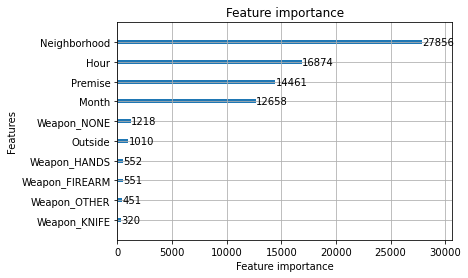

In [102]:
lgb.plot_importance(FINAL_MODEL)

In [106]:
X_maybe = X.drop(columns=["Weapon_KNIFE"])

In [107]:
start = timeit.default_timer()
scores = cross_val_score(FINAL, X_maybe, Y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  33.38617999999997


In [108]:
np.mean(scores)

0.39864835449440195

### Dropping least important features doesn't seem like a good idea. This is it.

In [110]:
FINAL_MODEL.booster_.save_model("MODEL.txt")

# TEST THIS ON NEW DATA

In [172]:
bpd_df = pd.read_csv('../data/Test_data_2017-18.csv')

In [173]:
bpd_df.CrimeDate = pd.to_datetime(bpd_df.CrimeDate)

In [174]:
date = bpd_df.CrimeDate.dt.month*100 + bpd_df.CrimeDate.dt.day
bpd_df['Season'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['winter','spring','summer','autumn','winter '])
                  .str.strip()
               )

In [175]:
bpd_df['Month'] = bpd_df.CrimeDate.dt.month

In [176]:
bpd_df['CrimeTime'] = [time if time != "24:00:00" else "0:00:00" for time in bpd_df['CrimeTime']]

In [177]:
bpd_df.CrimeTime = pd.to_datetime(bpd_df['CrimeTime'],format= '%H:%M:%S').dt.time

In [178]:
bpd_df['Hour'] = [int(str(time)[:2]) for time in bpd_df.CrimeTime]

In [179]:
bpd_df['Inside/Outside'] = bpd_df['Inside/Outside'].replace('I', 'Inside')
bpd_df['Inside/Outside'] = bpd_df['Inside/Outside'].replace('O', 'Outside')

In [180]:
bpd_df['Premise'] = bpd_df['Premise'].replace('Street', 'STREET')
bpd_df['Premise'] = bpd_df['Premise'].replace('GARAGE ON', 'SHED/GARAGE')
bpd_df['Premise'] = bpd_df['Premise'].replace('GARAGE ON', 'SHED/GARAGE')                           
                           

bpd_df[bpd_df['Premise'] == 'Street']['Premise'] = 'STREET'
bpd_df[bpd_df['Premise'] == 'GARAGE ON']['Premise'] = 'SHED/GARAGE'
bpd_df[bpd_df['Premise'] == 'SHED/GARAGE']['Premise'] = 'SHED/GARAGE'
bpd_df[bpd_df['Premise'] == 'Garage']['Premise'] = 'SHED/GARAGE'

<ipython-input-180-f5ecb6ffdff8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpd_df[bpd_df['Premise'] == 'SHED/GARAGE']['Premise'] = 'SHED/GARAGE'


In [181]:
bpd_df['Weapon'] = bpd_df['Weapon'].fillna('NONE')

In [182]:
bpd_df = bpd_df.drop(columns=["Location","Location 1"])

In [183]:
bpd_df = bpd_df.drop(columns="Total Incidents")

In [184]:
bpd_df["CrimeDate"] = pd.to_datetime(bpd_df["CrimeDate"])
bpd_df["Year"] = bpd_df["CrimeDate"].dt.year

In [185]:
bpd_df = bpd_df.drop(columns=["CrimeDate","CrimeTime"])

In [186]:
bpd_df = bpd_df.drop(columns="CrimeCode")

In [187]:
Description = pd.read_csv("../data/Description_decoder.csv", header=None)

In [188]:
Description

,0,1
0,AGG. ASSAULT,0
1,ARSON,1
2,ASSAULT BY THREAT,2
3,AUTO THEFT,3
4,BURGLARY,4
5,COMMON ASSAULT,5
6,HOMICIDE,6
7,LARCENY,7
8,LARCENY FROM AUTO,8
9,RAPE,9


In [189]:
bpd_df["Description"] 

0        LARCENY FROM AUTO
1                  LARCENY
2                 BURGLARY
3         ROBBERY - STREET
4                 BURGLARY
               ...        
65664           AUTO THEFT
65665             BURGLARY
65666    LARCENY FROM AUTO
65667       COMMON ASSAULT
65668           AUTO THEFT
Name: Description, Length: 65669, dtype: object

In [190]:
from sklearn.preprocessing import LabelEncoder 

In [191]:
le = LabelEncoder()

In [192]:
le.fit(Description[0])

LabelEncoder()

In [193]:
le.classes_

array(['AGG. ASSAULT', 'ARSON', 'ASSAULT BY THREAT', 'AUTO THEFT',
       'BURGLARY', 'COMMON ASSAULT', 'HOMICIDE', 'LARCENY',
       'LARCENY FROM AUTO', 'RAPE', 'ROBBERY - CARJACKING',
       'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE', 'ROBBERY - STREET',
       'SHOOTING'], dtype=object)

In [194]:
bpd_df["Description"]=le.transform(bpd_df["Description"])

In [195]:
Neigh = pd.read_csv("../data/Neighborhood_decoder.csv", header=None)

In [196]:
le.fit(Neigh[0])

LabelEncoder()

In [197]:
bpd_df["Neighborhood"]=le.transform(bpd_df["Neighborhood"])

ValueError: y contains previously unseen labels: 'Mcelderry Park'

In [198]:
bpd_df[bpd_df["Neighborhood"]=="Mcelderry Park"]

,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,Season,Month,Hour,Year
20,3,Outside,NONE,221.0,SOUTHEAST,Mcelderry Park,39.2983,-76.5794,STREET,winter,12,0,2018
69,7,Outside,NONE,333.0,EASTERN,Mcelderry Park,39.2988,-76.5820,STREET,autumn,12,0,2018
325,4,Inside,NONE,221.0,SOUTHEAST,Mcelderry Park,39.2965,-76.5787,ROW/TOWNHOUSE-OCC,summer,9,0,2018
407,7,Inside,NONE,221.0,SOUTHEAST,Mcelderry Park,39.2970,-76.5807,ROW/TOWNHOUSE-OCC,summer,8,0,2018
599,7,Inside,NONE,321.0,EASTERN,Mcelderry Park,39.2967,-76.5849,ROW/TOWNHOUSE-VAC,spring,6,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65325,5,Inside,NONE,333.0,EASTERN,Mcelderry Park,39.2989,-76.5783,ROW/TOWNHOUSE-OCC,spring,6,23,2018
65403,13,Outside,FIREARM,221.0,SOUTHEAST,Mcelderry Park,39.2968,-76.5822,STREET,winter,2,23,2018
65415,0,Outside,HANDS,221.0,SOUTHEAST,Mcelderry Park,39.2963,-76.5772,STREET,autumn,12,23,2018
65431,0,Inside,OTHER,221.0,SOUTHEAST,Mcelderry Park,39.2950,-76.5777,ROW/TOWNHOUSE-OCC,summer,9,23,2018


### Gotta drop these

### The sad thing is that there are many new neighborhoods with crime that were not there or did not have crime in previous years. We need to drop these to make the predictions work. Something to consider when retraining the model in the future.

In [199]:
bpd_df = bpd_df[bpd_df["Neighborhood"].isin(Neigh[0])]

In [200]:
bpd_df["Neighborhood"]=le.transform(bpd_df["Neighborhood"])

In [201]:
Premise = pd.read_csv("../data/Premise_decoder.csv", header=None)

In [202]:
le.fit(Premise[0])

LabelEncoder()

In [203]:
bpd_df["Premise"]=le.transform(bpd_df["Premise"])

ValueError: y contains previously unseen labels: nan

In [204]:
bpd_df = bpd_df[bpd_df["Premise"].notna()]

In [205]:
bpd_df["Premise"]=le.transform(bpd_df["Premise"])

ValueError: y contains previously unseen labels: 'STREET              '

In [206]:
bpd_df['Premise'] = bpd_df['Premise'].replace('STREET              ', 'STREET')

In [207]:
bpd_df["Premise"].unique()

array(['STREET', 'ROW/TOWNHOUSE-OCC', 'HOTEL/MOTEL         ',
       'OTHER - INSIDE      ', 'ROW/TOWNHOUSE-VAC',
       'RETAIL/SMALL BUSINES', 'APT/CONDO - OCCUPIED',
       'PARKING LOT-OUTSIDE ', 'PORCH/DECK          ',
       'GARAGE ON PRIV. PROP', 'RELIGIOUS  INSTITUTI',
       'OTHER - OUTSIDE     ', 'SCHOOL              ', 'VACANT BUILDING',
       'SHED/GARAGE', 'OTHER/RESIDENTIAL', 'YARD', 'YARD/BUSINESS',
       'VEHICLE', 'FAST FOOD', 'POLICE DEPARTMENT   ',
       'GAS STATION         ', 'DRIVEWAY', 'RESTAURANT',
       'RECREATION FACILITY', 'BAR', 'SHOPPING MALLS/CNTR ',
       'HOSP/NURS. HOME', 'PARK', 'ALLEY', 'PARKING LOT',
       'DRUG STORE / MED  BL', 'CONVENIENCE STORE',
       'LAUNDRY/CLEANRS/SHOE', 'PUBLIC HOUSING', 'SINGLE HOUSE',
       'BUS.  STORAGE SHED', 'CAR  REPAIR SHOP    ', 'DWELLING',
       'BUS/AUTO            ', 'LIQUOR STORE        ', 'OFFICE BUILDING',
       'BANK/FINANCIAL INST', 'BARBER/BEAUTY SHOP  ', 'CAR LOT-NEW/USED',
       'WHOLESALE/

### More cleaning needs to be done.... get rid of spaces at end

In [208]:
bpd_df["Premise"] = [i.rstrip() for i in bpd_df["Premise"]]

In [209]:
bpd_df["Premise"].unique()

array(['STREET', 'ROW/TOWNHOUSE-OCC', 'HOTEL/MOTEL', 'OTHER - INSIDE',
       'ROW/TOWNHOUSE-VAC', 'RETAIL/SMALL BUSINES',
       'APT/CONDO - OCCUPIED', 'PARKING LOT-OUTSIDE', 'PORCH/DECK',
       'GARAGE ON PRIV. PROP', 'RELIGIOUS  INSTITUTI', 'OTHER - OUTSIDE',
       'SCHOOL', 'VACANT BUILDING', 'SHED/GARAGE', 'OTHER/RESIDENTIAL',
       'YARD', 'YARD/BUSINESS', 'VEHICLE', 'FAST FOOD',
       'POLICE DEPARTMENT', 'GAS STATION', 'DRIVEWAY', 'RESTAURANT',
       'RECREATION FACILITY', 'BAR', 'SHOPPING MALLS/CNTR',
       'HOSP/NURS. HOME', 'PARK', 'ALLEY', 'PARKING LOT',
       'DRUG STORE / MED  BL', 'CONVENIENCE STORE',
       'LAUNDRY/CLEANRS/SHOE', 'PUBLIC HOUSING', 'SINGLE HOUSE',
       'BUS.  STORAGE SHED', 'CAR  REPAIR SHOP', 'DWELLING', 'BUS/AUTO',
       'LIQUOR STORE', 'OFFICE BUILDING', 'BANK/FINANCIAL INST',
       'BARBER/BEAUTY SHOP', 'CAR LOT-NEW/USED', 'WHOLESALE/DISC. STOR',
       'GROCERY/CONFECTION', 'JEWELRY STORE', 'SPECIALTY STORE',
       'UNKNOWN', 'PUBLIC A

In [210]:
len(bpd_df)

47045

In [211]:
bpd_df = bpd_df[bpd_df["Premise"].isin(Premise[0])]

In [212]:
len(bpd_df)

22799

### Many new premises it seems.

In [213]:
bpd_df["Premise"]=le.transform(bpd_df["Premise"])

In [214]:
bpd_df = pd.get_dummies(bpd_df, columns=["Inside/Outside"],drop_first=True)

In [215]:
bpd_df= bpd_df.rename(columns={"Inside/Outside_Outside":"Outside"})

In [216]:
bpd_df[bpd_df["Weapon"]=="FIRE"]

,Description,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,Season,Month,Hour,Year,Outside
2135,1,FIRE,432.0,NORTHEAST,11,39.3223,-76.5700,118,spring,5,0,2018,1
2451,1,FIRE,633.0,NORTHWEST,3,39.3486,-76.6780,103,spring,4,0,2018,1
3767,1,FIRE,621.0,NORTHWEST,120,39.3366,-76.6918,103,summer,8,1,2018,1
4495,1,FIRE,424.0,NORTHEAST,175,39.3648,-76.5559,103,summer,7,1,2018,1
4496,1,FIRE,424.0,NORTHEAST,175,39.3648,-76.5559,103,summer,7,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62097,1,FIRE,313.0,EASTERN,99,39.3100,-76.6124,0,winter,12,22,2017,1
63399,1,FIRE,922.0,SOUTHERN,45,39.2487,-76.6270,103,winter,1,23,2018,1
64392,1,FIRE,923.0,SOUTHERN,135,39.2567,-76.6454,118,winter,2,23,2018,1
65194,1,FIRE,935.0,SOUTHERN,174,39.2812,-76.6435,103,winter,2,23,2018,1


In [217]:
bpd_df = bpd_df[bpd_df["Weapon"]!="FIRE"]

### Aaaaand a new weapon type. Fire for arson. Drop.

In [218]:
bpd_df["Weapon"].unique()

array(['NONE', 'KNIFE', 'FIREARM', 'OTHER', 'HANDS'], dtype=object)

In [219]:
bpd_df = pd.get_dummies(bpd_df, columns=["Weapon"])

In [220]:
bpd_df

,Description,Post,District,Neighborhood,Longitude,Latitude,Premise,Season,Month,Hour,Year,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER
1,7,523.0,NORTHERN,118,39.3556,-76.6099,103,winter,12,0,2018,1,0,0,0,1,0
5,3,613.0,NORTHWEST,136,39.3438,-76.6777,103,winter,12,0,2018,1,0,0,0,1,0
7,8,942.0,SOUTHERN,82,39.2756,-76.6129,103,winter,12,0,2018,1,0,0,0,1,0
8,7,232.0,SOUTHEAST,71,39.2906,-76.5315,103,winter,12,0,2018,1,0,0,0,1,0
9,7,835.0,SOUTHWEST,227,39.2878,-76.6745,103,winter,12,0,2018,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65655,5,232.0,SOUTHEAST,132,39.2918,-76.5598,10,spring,5,23,2018,0,0,0,0,1,0
65659,6,722.0,WESTERN,158,39.2951,-76.6474,103,spring,4,23,2018,1,1,0,0,0,0
65662,8,331.0,EASTERN,235,39.3124,-76.5899,103,spring,3,23,2018,1,0,0,0,1,0
65666,8,824.0,SOUTHWEST,1,39.2926,-76.6816,103,summer,9,23,2017,1,0,0,0,1,0


In [221]:
finally_maybe = bpd_df[['Outside', 'Weapon_FIREARM','Weapon_HANDS','Weapon_KNIFE','Weapon_NONE','Weapon_OTHER', 'Neighborhood', 'Premise', 'Month', 'Hour','Description']]

In [222]:
finally_maybe.to_csv("../data/Test_transformed.csv")

In [433]:
X_test = finally_maybe.drop(columns = ['Description'])
Y_test = finally_maybe['Description']

In [434]:
FINAL_PREDICTIONS = FINAL_MODEL.predict(X_test)

In [166]:
from sklearn import metrics

In [436]:
metrics.accuracy_score(FINAL_PREDICTIONS,Y_test)

0.404021294381627

In [440]:
metrics.recall_score(FINAL_PREDICTIONS,Y_test,average="weighted",zero_division=0)

0.404021294381627

In [441]:
metrics.precision_score(FINAL_PREDICTIONS,Y_test,average="weighted",zero_division=0)

0.5125862534031598

In [442]:
metrics.f1_score(FINAL_PREDICTIONS,Y_test,average="weighted",zero_division=0)

0.4394776208370662

# TO LOAD MODEL

In [456]:
# MODEL = lgb.Booster(model_file='YOLO_SWAG.txt')

# NB SUPPOSEDLY BETTER. TUNE

In [28]:
from sklearn.naive_bayes import BernoulliNB

In [29]:
clf = BernoulliNB()

In [36]:
param_grid = [
    {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] }
  ]

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_search = GridSearchCV(clf, param_grid, cv=5,
                           scoring='f1_macro',
                           return_train_score=True)

In [39]:
grid_search.fit(X_1hot,Y_1hot)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1]}],
             return_train_score=True, scoring='f1_macro')

In [40]:
grid_search.best_score_

0.4130233086995429

In [41]:
grid_search.best_params_

{'alpha': 0.1}

### NB performs better with everything 1 hotted. This doesn't take too long. Acceptable.

In [42]:
FINAL = BernoulliNB(alpha=0.1)

In [44]:
start = timeit.default_timer()
FINAL_MODEL = FINAL.fit(X_1hot,Y_1hot)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  14.031531999999743


In [45]:
X_1hot.shape

(276529, 441)

In [65]:
from joblib import dump, load

In [66]:
dump(FINAL_MODEL,"FINAL_MODEL.joblib")

['FINAL_MODEL.joblib']

## Redo Test Set for this and save as new csv. Results in new notebook.

### I reran some earlier cells instead of redoing it all

In [156]:
bpd_df

,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,Season,Month,Hour,Year
1,LARCENY,Outside,NONE,523.0,NORTHERN,Homeland,39.3556,-76.6099,STREET,winter,12,0,2018
5,AUTO THEFT,Outside,NONE,613.0,NORTHWEST,Langston Hughes,39.3438,-76.6777,STREET,winter,12,0,2018
7,LARCENY FROM AUTO,Outside,NONE,942.0,SOUTHERN,Federal Hill,39.2756,-76.6129,STREET,winter,12,0,2018
8,LARCENY,Outside,NONE,232.0,SOUTHEAST,Eastwood,39.2906,-76.5315,STREET,winter,12,0,2018
9,LARCENY,Outside,NONE,835.0,SOUTHWEST,Saint Josephs,39.2878,-76.6745,STREET,winter,12,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65655,COMMON ASSAULT,Inside,NONE,232.0,SOUTHEAST,Kresson,39.2918,-76.5598,BAR,spring,5,23,2018
65659,HOMICIDE,Outside,FIREARM,722.0,WESTERN,Midtown-Edmondson,39.2951,-76.6474,STREET,spring,4,23,2018
65662,LARCENY FROM AUTO,Outside,NONE,331.0,EASTERN,South Clifton Park,39.3124,-76.5899,STREET,spring,3,23,2018
65666,LARCENY FROM AUTO,Outside,NONE,824.0,SOUTHWEST,Allendale,39.2926,-76.6816,STREET,summer,9,23,2017


In [157]:
uc2_df = bpd_df[['Inside/Outside', 'Weapon', 'Neighborhood', 'Premise', 'Month', 'Hour','Description']]

In [158]:
uc2_df = pd.get_dummies(uc2_df, columns = ['Inside/Outside', 'Weapon', 'Neighborhood', 'Premise', 'Month', 'Hour'])

In [159]:
uc2_df.shape

(22729, 308)

In [160]:
X_test = uc2_df.drop(columns = ['Description'])
Y_test = uc2_df['Description']

In [161]:
maybe = FINAL_MODEL.predict(X_test)

ValueError: Expected input with 441 features, got 307 instead

In [162]:
differences = []
for i in X_1hot.columns:
    if i not in X_test.columns:
        differences.append(i)

In [163]:
differences

['Neighborhood_Bayview',
 'Neighborhood_Belvedere',
 'Neighborhood_Boyd-Booth',
 "Neighborhood_Butcher's Hill",
 'Neighborhood_CARE',
 'Neighborhood_Carroll - Camden Industri',
 'Neighborhood_Chinquapin Park',
 'Neighborhood_Coldstream Homestead Mont',
 'Neighborhood_Concerned Citizens Of For',
 'Neighborhood_Coppin Heights/Ash-Co-Eas',
 'Neighborhood_Curtis Bay Industrial Are',
 'Neighborhood_Downtown West',
 'Neighborhood_Dundalk Marine Terminal',
 'Neighborhood_Edgewood',
 'Neighborhood_Evesham Park',
 'Neighborhood_Glenham-Belhar',
 'Neighborhood_Hamilton Hills',
 'Neighborhood_Locust Point Industrial A',
 'Neighborhood_Lower Edmondson Village',
 'Neighborhood_McElderry Park',
 'Neighborhood_Middle Branch/Reedbird Pa',
 'Neighborhood_North Roland Park/Poplar',
 'Neighborhood_Northwest Community Actio',
 'Neighborhood_Old Goucher',
 'Neighborhood_Orangeville Industrial Ar',
 'Neighborhood_Orchard Ridge',
 'Neighborhood_Patterson Park Neighborho',
 'Neighborhood_Penrose/Fayette Stree

In [164]:
X_test[differences] = 0

In [165]:
maybe = FINAL_MODEL.predict(X_test)

In [167]:
metrics.accuracy_score(maybe,Y_test)

0.2694795195565137

In [169]:
metrics.recall_score(maybe,Y_test,average="weighted",zero_division=0)

0.2694795195565137

In [170]:
metrics.precision_score(maybe,Y_test,average="weighted",zero_division=0)

0.39516007211451837

In [171]:
metrics.f1_score(maybe,Y_test,average="weighted",zero_division=0)

0.2969819354806202

# Very interesting. 1-hoting everything results in far fewer features if those categories are missing in the new data, resulting in substandard performance! Original model is the way to go.